In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


# Step 1: Load Data and NLTK Basics

## Import Libraries

Import the necessary libraries for data manipulation, sentiment analysis, and model building.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

## Load the Dataset

Load the Amazon customer reviews dataset.

In [3]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Explanatory Data Analysis

**Count of Reviews by Stars**

This code will generate a bar chart showing the count of reviews for each star rating in the dataset.

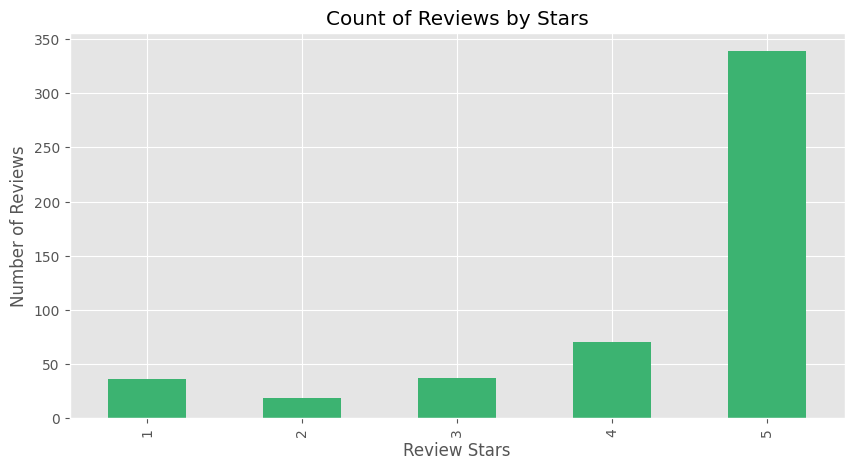

In [5]:
# Assuming df is your DataFrame and 'Score' is the column with review ratings
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          color='#3CB371',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Number of Reviews')



plt.show()

**Helpfulness Ratio Analysis**

Calculate the helpfulness ratio (HelpfulnessNumerator / HelpfulnessDenominator) and analyze its distribution.

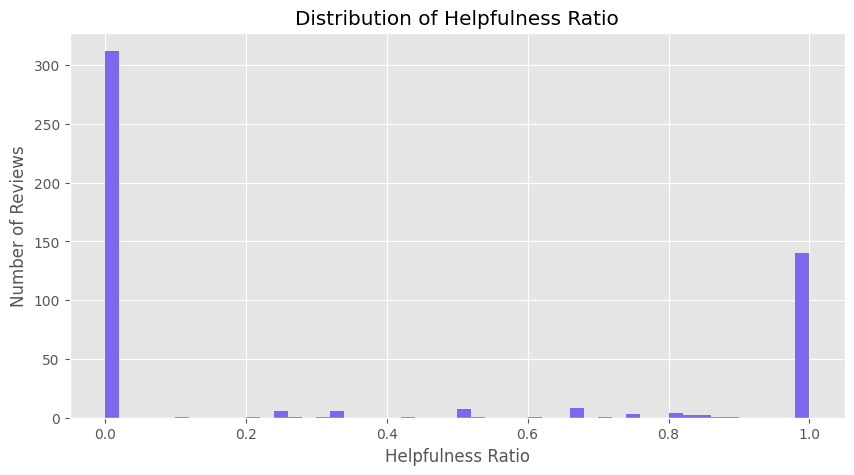

In [6]:
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, 1)
plt.figure(figsize=(10, 5))
plt.hist(df['HelpfulnessRatio'], bins=50, color='#7B68EE')
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Number of Reviews')
plt.show()

**Review Count by Time**

Convert the Time column to a datetime format and analyze the number of reviews over time.

/tmp/ipykernel_33/2724597793.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('ReviewTime')['Id'].resample('M').count().plot(figsize=(10, 5), color='teal')


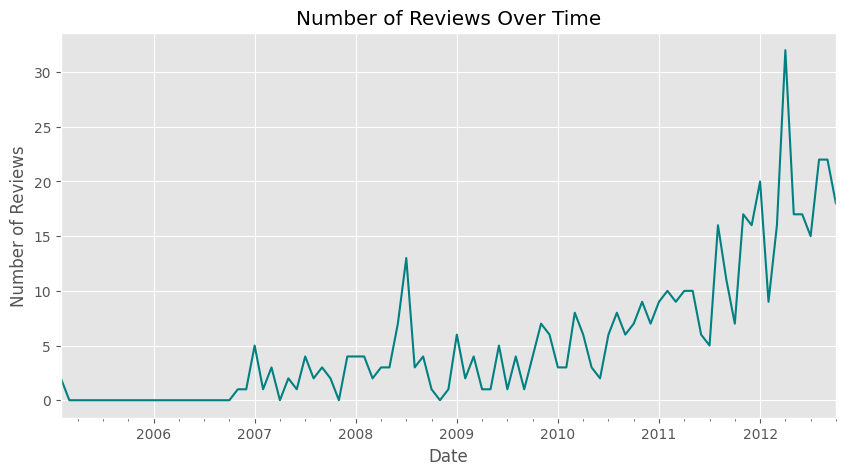

In [7]:
df['ReviewTime'] = pd.to_datetime(df['Time'], unit='s')  # Assuming 'Time' is in UNIX timestamp
df.set_index('ReviewTime')['Id'].resample('M').count().plot(figsize=(10, 5), color='teal')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

**Distribution of Word Count in Reviews**

Analyze the distribution of the number of words in the review text.

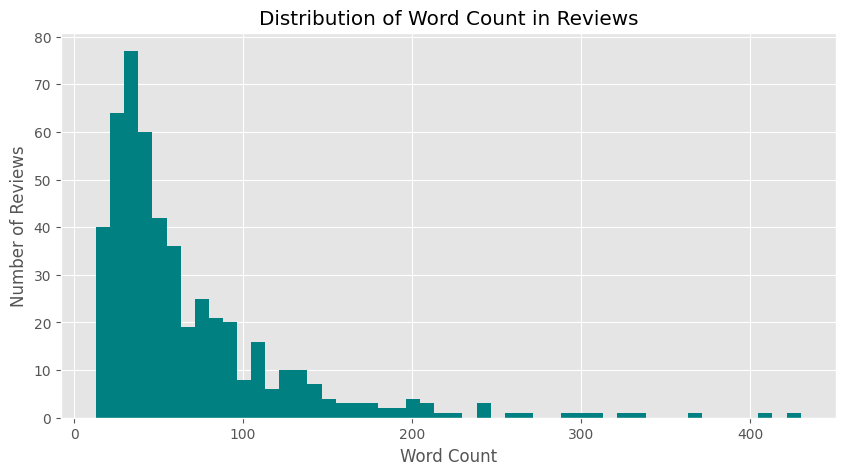

In [9]:
df['WordCount'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
plt.hist(df['WordCount'], bins=50, color='teal')
plt.title('Distribution of Word Count in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Number of Reviews')
plt.show()

## Basic NLTK

Here are some basic Natural Language Toolkit (NLTK) operations that you can perform on your text data, such as tokenization, stopwords removal, stemming, lemmatization, and part-of-speech tagging.

**Tokenization:** Break down the review text into individual words (tokens).

In [10]:
import nltk
from nltk.tokenize import word_tokenize

example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [11]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

**Part-of-Speech Tagging:** Tag each token with its part of speech.

In [12]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

**Named Entity Recognition (NER):** Identify named entities (like people, organizations, locations) in the text.

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


These steps are fundamental in many NLP tasks and help in extracting meaningful information from the text.

# Step 2: VADER Seniment Scoring

To perform sentiment analysis using NLTK's SentimentIntensityAnalyzer (VADER), follow these steps:

## Import Libraries and Download NLTK Data

Ensure you have the required NLTK libraries and data.

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


**Sentiment Analysis:** The SentimentIntensityAnalyzer calculates the sentiment scores, which include:

**neg:** The proportion of text that expresses negative sentiment.

**neu:** The proportion of text that is neutral.

**pos:** The proportion of text that expresses positive sentiment.

**compound:** A normalized score that combines the above scores into a single value, ranging from -1 (most negative) to 1 (most positive).


This approach provides a simple yet effective way to gauge the sentiment of text data using VADER.

In [15]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [16]:
from tqdm import tqdm  # Ensure tqdm is imported if used

# Initialize an empty dictionary to store results
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    
    # Check the text and ID to ensure they are not empty or NaN
    if pd.notna(text) and pd.notna(myid):
        res[myid] = sia.polarity_scores(text)
    else:
        print(f"Skipping row {i} due to missing values.")

100%|██████████| 500/500 [00:00<00:00, 753.79it/s]


## Compute Sentiment Scores and Create DataFrame

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,ReviewTime,WordCount
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011-04-27,48
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,2012-09-07,31
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008-08-18,94
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011-06-13,41
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,2012-10-21,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,0.0,2008-01-27,33
496,497,0.059,0.791,0.150,0.8215,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,0.0,2007-12-04,65
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,0.0,2007-08-09,148
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",0.0,2007-07-12,35


## Visualize the Sentiment Scores

**Compound Score by Amazon Star Review**

Positive, Neutral, and Negative Scores by Amazon Star Review

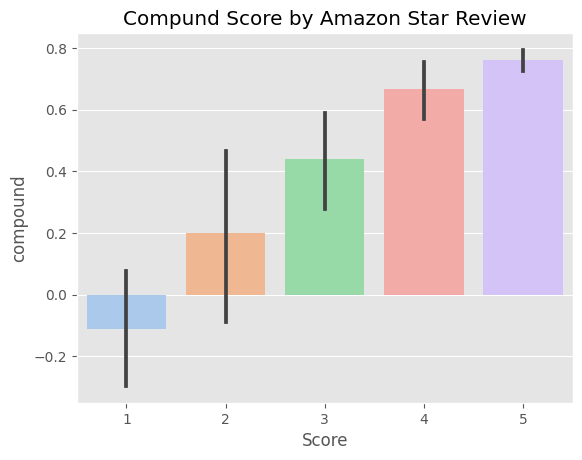

In [18]:
# Define custom colors
custom_palette = sns.color_palette("pastel")

ax = sns.barplot(data=vaders, x='Score', y='compound', palette=custom_palette)
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

**Creating DataFrame**

vaders DataFrame is created from the sentiment results. Each row corresponds to a review, and the sentiment scores (compound, pos, neu, neg) are added.

**Merging DataFrames:**

vaders is merged with the original df DataFrame to combine the sentiment scores with the review information.

**Visualization:**

The first plot shows the compound sentiment score (overall sentiment) by review star rating.
The second set of plots shows the positive, neutral, and negative sentiment scores for each review star rating, giving a detailed view of how sentiment varies with the rating.

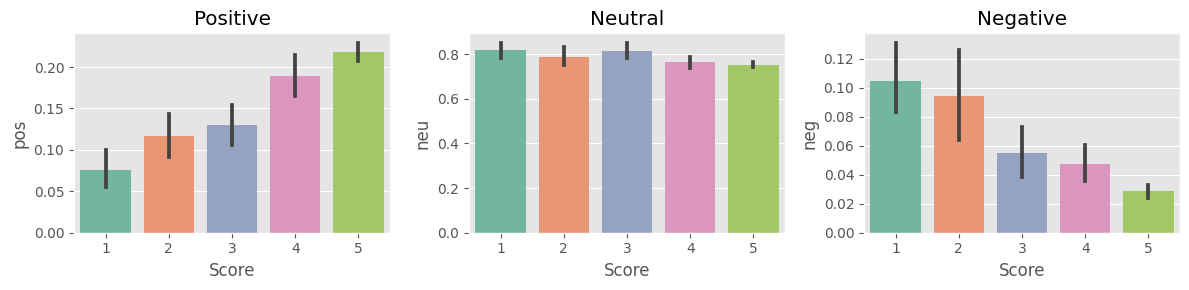

In [19]:

custom_palette = sns.color_palette("Set2")

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], palette=custom_palette)
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], palette=custom_palette)
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], palette=custom_palette)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3: Roberta Pretrained Model

Use a model trained of a large corpus of data.
Transformer model accounts for the words but also the context related to other words.

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

**Load the Model and Tokenizer:**

Load the pre-trained model and tokenizer for sentiment analysis.

In [21]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [22]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

**Analyze the sentiment of a text using the Roberta model:**

Here we are goin to analyze the sentiment of a given text using the Roberta model from Hugging Face's transformers library. The process involves tokenizing the text, passing it through the model, and then applying the softmax function to obtain probabilities for negative, neutral, and positive sentiments.

In [23]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687453, 'roberta_pos': 0.0029573678}




The function polarity_scores_roberta is designed to analyze the sentiment of a given text using the Roberta model from Hugging Face's transformers library. The function performs tokenization, model inference, applies softmax to the output, and then returns the sentiment scores in a dictionary format.

This will return the sentiment analysis results for the given text, showing the probabilities for negative, neutral, and positive sentiments according to the Roberta model.

In [27]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

Here we intended to run sentiment analysis on a dataset of Amazon reviews, combining results from both VADER (a rule-based model) and Roberta (a transformer-based model). It iterates over each row in the dataframe (df), processes the text using both models, and then stores the results in a dictionary (res) keyed by the review ID (myid).

**After Running the Code:**

Once the loop completes, we will have a dictionary res that contains the sentiment scores for each review in our dataset. We can then convert this dictionary into a DataFrame for further analysis, visualization, or modeling.

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

 17%|█▋        | 84/500 [00:16<00:58,  7.08it/s]

Broke for id 83


 38%|███▊      | 188/500 [00:35<00:39,  7.92it/s]

Broke for id 187


100%|██████████| 500/500 [01:37<00:00,  5.14it/s]


After running this code, we'll have a DataFrame (results_df) that includes all the original columns from df, plus the sentiment scores generated by VADER and Roberta.

In [30]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

This will output a list of all the column names in results_df.

In [31]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'HelpfulnessRatio', 'ReviewTime',
       'WordCount'],
      dtype='object')

## Combine and compare

To visualize the relationships between the VADER and RoBERTa sentiment scores with respect to the review Score, we can use Seaborn's pairplot.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

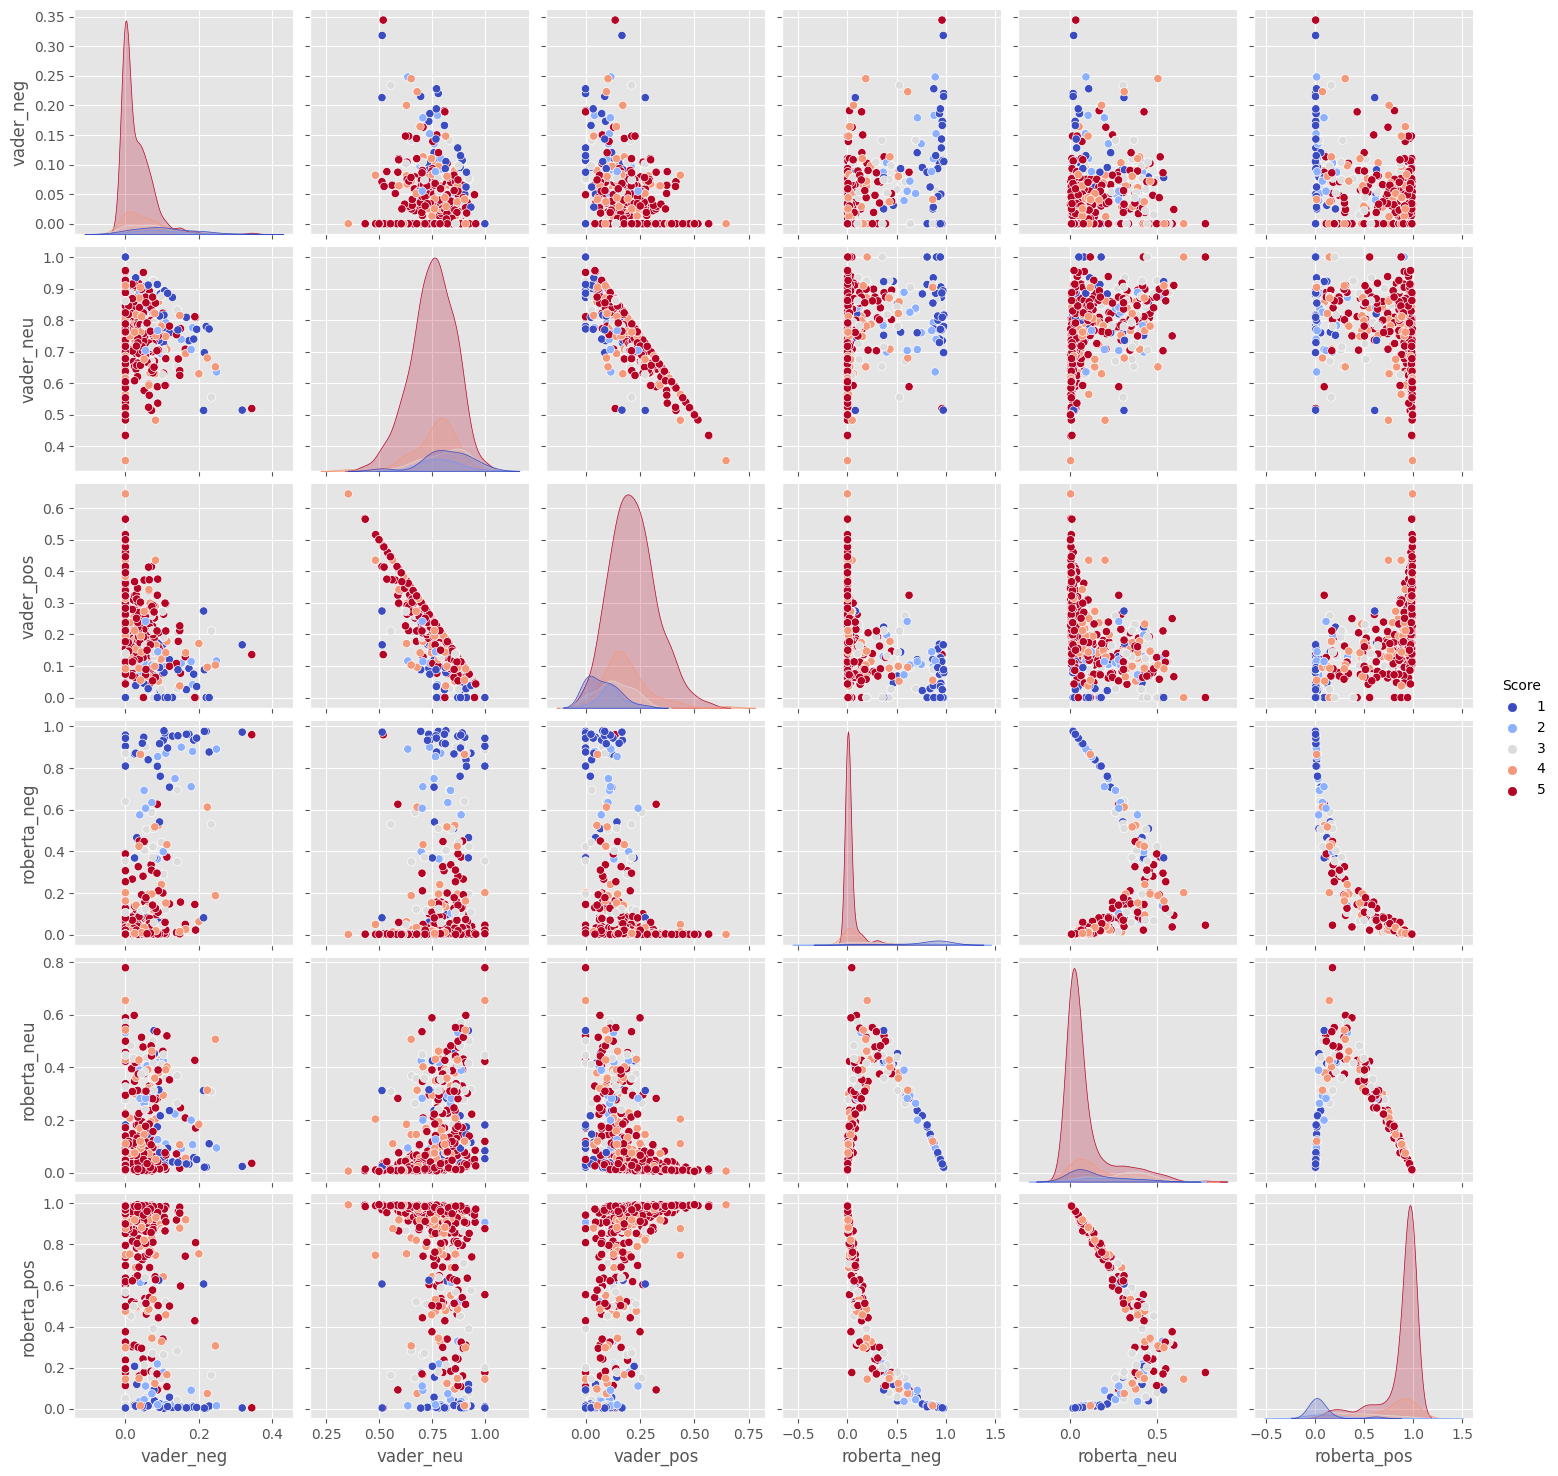

In [32]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='coolwarm')
plt.show()

## Review Examples

To find examples where the model scoring and review score differ the most, we can query your DataFrame to find reviews where the model's sentiment score and the review's star rating are at odds. Specifically, we can look at extreme cases like positive sentiment in 1-star reviews and negative sentiment in 5-star reviews. Here's how you might approach it:


Finding Examples of Positive 1-Star and Negative 5-Star Reviews

**Positive 1-Star Review:**

Find the review with the highest positive sentiment (roberta_pos) score among those with a 1-star rating.

**Negative 5-Star Review:**

Find the review with the highest negative sentiment (roberta_neg) score among those with a 5-star rating.

This code will generate a grid of scatter plots showing the pairwise relationships between VADER and RoBERTa sentiment scores, with points colored by the review Score.

In [33]:
import pandas as pd

# Find the most positive 1-star review
positive_1_star_reviews = results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)
most_positive_1_star_review = positive_1_star_reviews['Text'].values[0] if not positive_1_star_reviews.empty else "No 1-star reviews found"

# Find the most negative 5-star review
negative_5_star_reviews = results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)
most_negative_5_star_review = negative_5_star_reviews['Text'].values[0] if not negative_5_star_reviews.empty else "No 5-star reviews found"

print("Most Positive 1-Star Review:")
print(most_positive_1_star_review)
print("\nMost Negative 5-Star Review:")
print(most_negative_5_star_review)

Most Positive 1-Star Review:
I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.

Most Negative 5-Star Review:
this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


# Step 4: The Transformers Pipeline

Using the pipeline API from the transformers library is a great way to quickly perform sentiment analysis with pre-trained models. The pipeline function simplifies the process of applying a model to text data, allowing us to easily get sentiment scores or labels.

In [34]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

2024-08-12 23:33:42.575771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 23:33:42.575995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 23:33:42.743350: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

### Initialize the Pipeline:

**sent_pipeline = pipeline("sentiment-analysis"):**  Creates a sentiment analysis pipeline using a default pre-trained model. By default, it uses a model fine-tuned on sentiment analysis tasks (like distilbert-base-uncased-finetuned-sst-2-english).

### Perform Sentiment Analysis:

**sent_pipeline(texts):** Applies sentiment analysis to each text in the texts list. The pipeline returns a list of dictionaries with sentiment labels and scores.
Print Results:

Iterates over the texts and their corresponding results, printing out each text’s sentiment and confidence score.

Using the sent_pipeline to analyze the sentiment of a single text is straightforward.

In [35]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sent_pipeline = pipeline("sentiment-analysis")

# Analyze the sentiment of a single text
text = "Make sure to like and subscribe!"
result = sent_pipeline(text)

# Print the result
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9991742968559265}]
